In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString
import pandas as pd 

In [83]:

file = uproot.open("dati/cilindrofan/150mev/coll/Hitsxp10.root")
tree = file["Hits"]

data = tree.arrays(library="pd")

Bremm LOr intensity

In [84]:
data=data[(data['processName'] == 'eBrem')]
data1 = data[(data['z'] > 0)]   
data2 = data[(data['z'] < 0)]

print(np.shape(data1))
print(np.shape(data2))

(3986, 11)
(3969, 11)


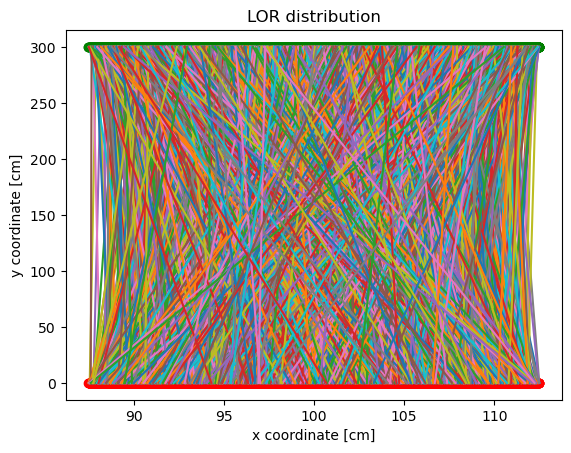

In [85]:



x1 = np.array(data1['x'].head(3969)) # X positions of the first scintillator

x2 = np.array(data2['x'].head(3969)) # X positions of the second scintillator

# Calculate the midpoint between the two scintillators
midpoint = (x1 + x2) / 2

# Calculate the slope of the line connecting the two scintillators
slope = (x2 - x1)

# Calculate the y-intercept of the line connecting the two scintillators
intercept = np.zeros_like(midpoint)  
# Distance between the scintillators
distance = 300.0  # cm

y_values = np.zeros_like(x1)  



for i in range(len(x1)):
    x_values = np.array([x1[i], x2[i]])
    plt.plot(x_values, y_values[i] + np.array([0, distance]))

plt.scatter(x1, y_values, c='r')
plt.scatter(x2, y_values + distance, c='g')

plt.xlabel('x coordinate [cm]')
plt.ylabel('y coordinate [cm]')
plt.title('LOR distribution')
plt.show()


In [86]:
y=np.linspace(-300,300,300)


lines1 = [LineString([(x1[i], -300), (x2[i], 300)]) for i in range(len(x2))]
lines2 = [LineString([(-1000, y[j]), (1000, y[j])]) for j in range(len(y))]

distry=np.zeros((len(x1),len(y)))
# Loop through and calculate intersections
for j in range(len(y)):
    for i in range(len(x2)):
        x = (lines1[i].intersection(lines2[j])).x
        distry[i, j] = x

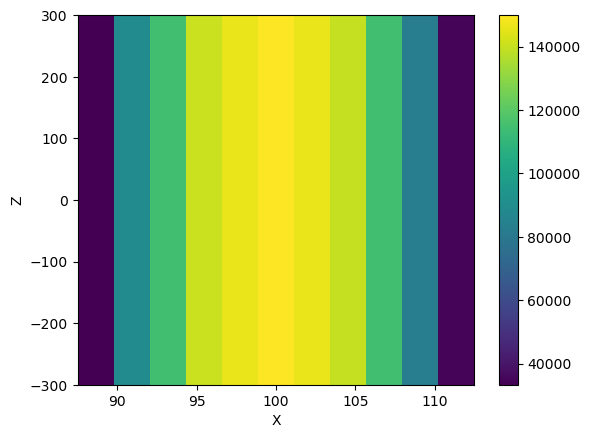

In [87]:
y = np.linspace(-300,300,distry.shape[1])

x_flattened = distry.flatten()
y_flattened = np.tile(y, distry.shape[0])

mask = ~np.isnan(x_flattened)
x_filtered1 = x_flattened[mask]
y_filtered1 = y_flattened[mask]

plt.hist2d(x_filtered1, y_filtered1, bins=[11,1], cmap='viridis',range=[[np.min(x_filtered1), np.max(x_filtered1)],[-300,300]])

plt.colorbar()

plt.xlabel('X')
plt.ylabel('Z')

plt.show()


149907.0


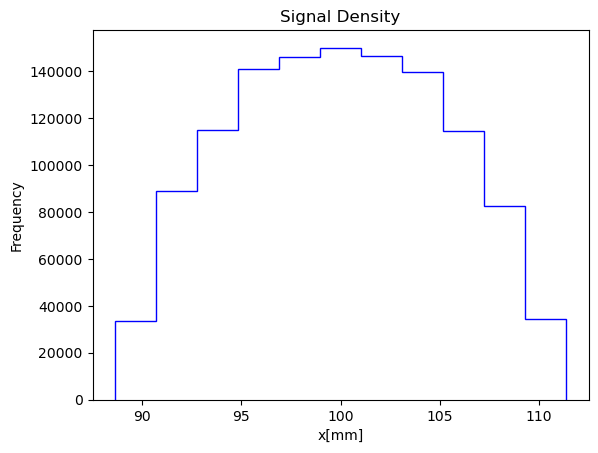

In [88]:
hist2d, x_edges, y_edges = np.histogram2d(x_filtered1, y_filtered1, bins=(11, 1),range=[[np.min(x_filtered1), np.max(x_filtered1)],[-300,300]])

slice_index = 0

# Extract the slice from the 2D histogram
hist_slice = hist2d[:, slice_index]

bin_centers_x = (x_edges[:-1] + x_edges[1:]) / 2
print(np.max(hist_slice))
plt.hist(bin_centers_x, weights=hist_slice, color='blue', bins=11
         ,histtype='step')

# Add labels and title
plt.xlabel('x[mm]')
plt.ylabel('Frequency')
plt.title('Signal Density')

# Show the plot
plt.show()

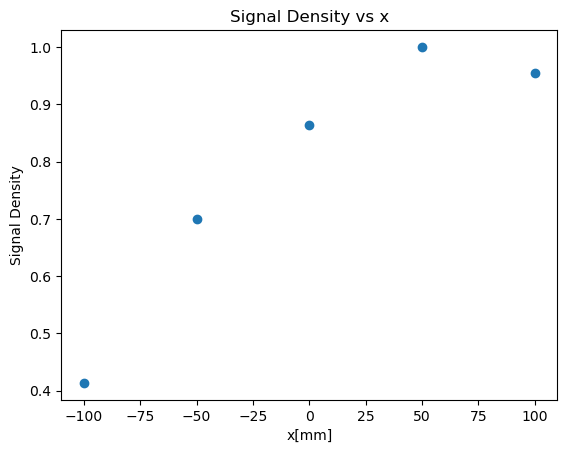

In [3]:
x=[-100,-50,-0,50,100]
sig=[65000,109960,135788,157147,149907]
sig=np.array(sig)/np.max(sig)

plt.scatter(x,sig)
plt.xlabel('x[mm]')
plt.ylabel('Signal Density')
plt.title('Signal Density vs x')
plt.show()


Demonstration

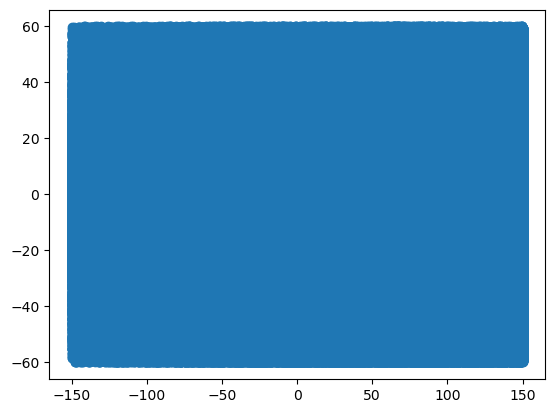

In [14]:
csv_file_path3 = 'dati/cilindrofan/150mev/coll/gamma_entering_particles.csv'


df_gamma = pd.read_csv(csv_file_path3, delimiter=',', header=None, names=['Energy', 'X', 'Y', 'Z','pX', 'pY', 'pZ','evt'])


plt.scatter(df_gamma['X'], df_gamma['Y'])
#plt.xlim(-150, 150)
#plt.ylim(-100, 100)
plt.show()

In [15]:

mask = ~np.isclose(df_gamma['Energy'], 510.99, atol=0.1 * 510.99)
df_gamma_filtered = df_gamma[mask]



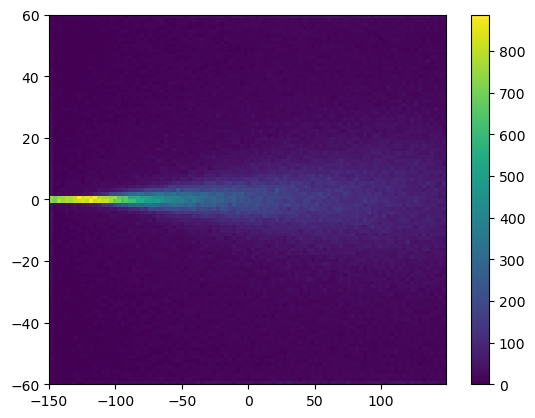

In [17]:
plt.hist2d(df_gamma_filtered['X'], df_gamma_filtered['Y'], bins=(100,100), cmap='viridis',range=[[-150, 149], [-60, 60]])
plt.colorbar()
plt.show()

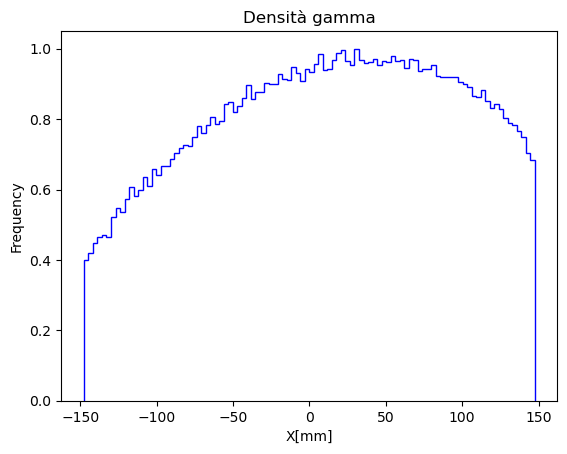

In [20]:
hist2d, x_edges, y_edges = np.histogram2d(df_gamma_filtered['X'], df_gamma_filtered['Y'], bins=(100, 1), range=[[-149, 149], [-100, 100]])

slice_index = 0

# Extract the slice from the 2D histogram
hist_slice = hist2d[:, slice_index]

hist_slice = hist_slice / np.max(hist_slice)

bin_centers_x = (x_edges[:-1] + x_edges[1:]) / 2

plt.hist(bin_centers_x, weights=hist_slice, color='blue', bins=100,histtype='step')

# Add labels and title
plt.xlabel('X[mm]')
plt.ylabel('Frequency')
plt.title('Densità gamma')

#plt.scatter(x,sig,color='red')

# Show the plot
plt.show()

Angolare

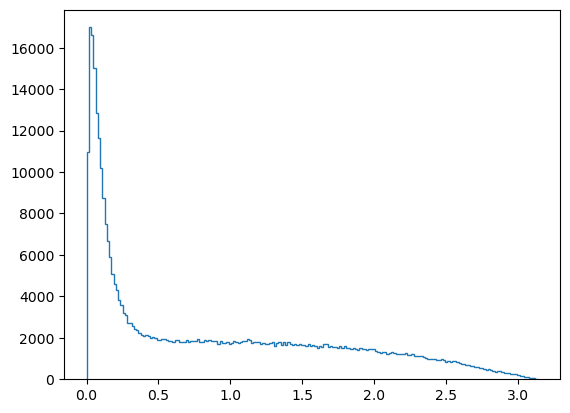

In [21]:
theta=np.arccos(df_gamma['pX']/np.sqrt(df_gamma['pX']**2+df_gamma['pY']**2+df_gamma['pZ']**2))

plt.hist(theta, bins=200, histtype='step')
plt.show()

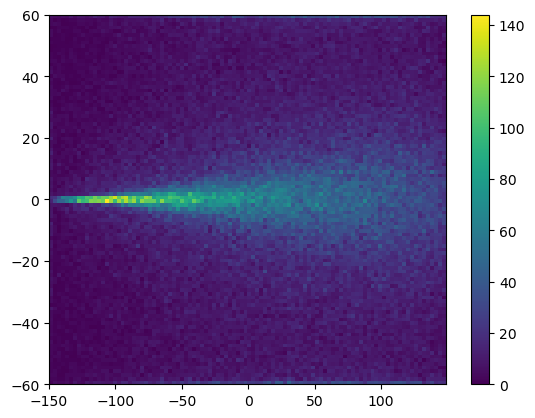

In [24]:
df_gamma['theta']=theta

df_gamma=df_gamma[np.isclose(df_gamma['theta'],1.5,atol=0.5*1.5)]


plt.hist2d(df_gamma['X'], df_gamma['Y'], bins=(100,100), cmap='viridis',range=[[-150, 149], [-60, 60]])
plt.colorbar()
plt.show()

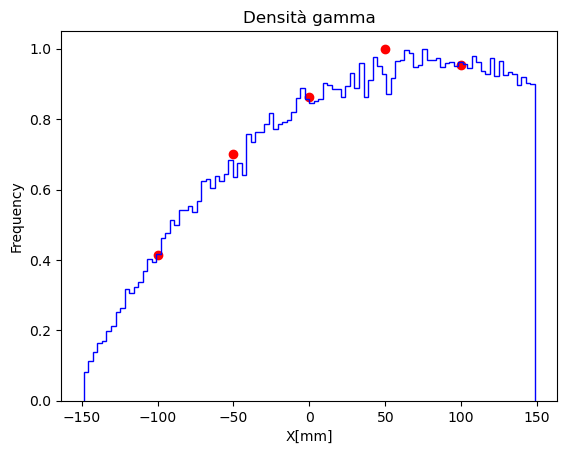

In [33]:
hist2d, x_edges, y_edges = np.histogram2d(df_gamma['X']+150, df_gamma['Y'], bins=(100, 1), range=[[-149.99, 149.99], [-100, 100]])

slice_index = 0

# Extract the slice from the 2D histogram
hist_slice = hist2d[:, slice_index]

hist_slice = hist_slice / np.max(hist_slice)

bin_centers_x = (x_edges[:-1] + x_edges[1:]) / 2

plt.hist(bin_centers_x, weights=hist_slice, color='blue', bins=100,histtype='step')

# Add labels and title
plt.xlabel('X[mm]')
plt.ylabel('Frequency')
plt.title('Densità gamma')

plt.scatter(x,sig,color='red')

# Show the plot
plt.show()

confronto conn annichilazione

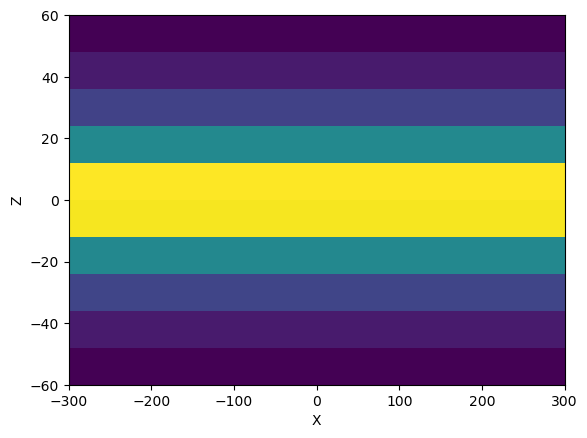

In [8]:
dt = np.genfromtxt('dati/cilindrofan/150mev/annihilation_positions60cm.csv', delimiter=',')


# Calculate depth (assuming depth is the z-coordinate)
x_values_ann = dt[:,0]
z_values_ann = dt[:,2]
y_values = dt[:,1]  


plt.hist2d(x_values_ann,z_values_ann, bins=(1,10), range=[[-300, 300], [-60, 60]], cmap='viridis')
plt.xlabel('X')
plt.ylabel('Z')
plt.show()

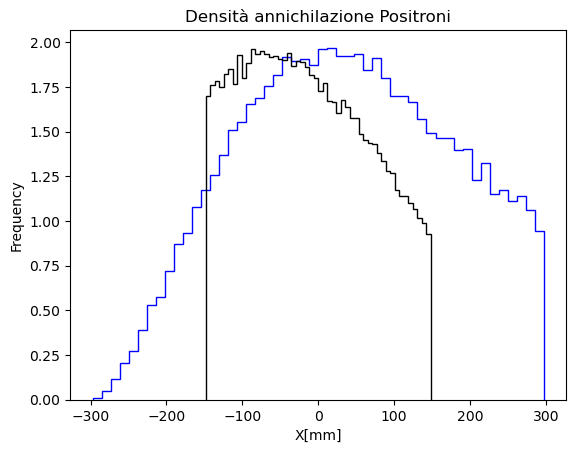

In [12]:
hist2d_ann, x_edges_ann, y_edges_ann = np.histogram2d(x_values_ann, z_values_ann, bins=(100, 1), range=[[-300, 300], [-200, 200]])

slice_index = 0

# Extract the slice from the 2D histogram
hist_slice_ann = hist2d_ann[:, slice_index]
hist_slice_ann = hist_slice_ann / np.max(hist_slice_ann)


bin_centers_x_ann = (x_edges_ann[:-1] + x_edges_ann[1:]) / 2

plt.hist(bin_centers_x_ann, weights=hist_slice_ann, color='blue', bins=50,histtype='step')

plt.hist(bin_centers_x, weights=hist_slice, color='black', bins=50,histtype='step')



# Add labels and title
plt.xlabel('X[mm]')
plt.ylabel('Frequency')
plt.title('Densità annichilazione Positroni')

# Show the plot
plt.show()

In [24]:

file = uproot.open("build/Hits.root")
tree = file["Hits"]

data = tree.arrays(library="pd")

edep= data['EDep']

xloc= data['xloc'] 




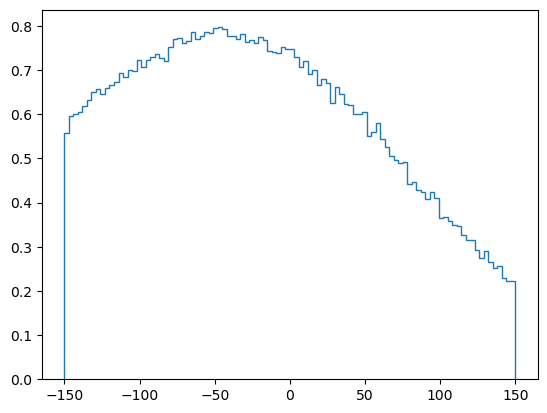

In [25]:
edep=np.array(edep)/17500
plt.hist(xloc,weights=edep,bins=100,histtype='step',range=(-150,150))
plt.show()


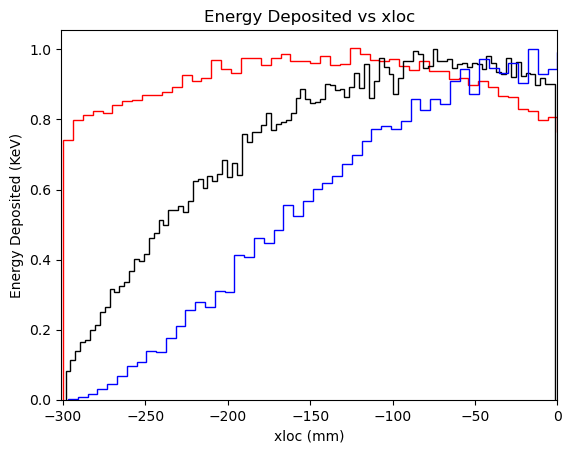

In [66]:
plt.hist(xloc,weights=edep,bins=100,histtype='step',color='red')

plt.hist(bin_centers_x-150, weights=hist_slice, color='black', bins=100,histtype='step')
plt.hist(bin_centers_x_ann, weights=hist_slice_ann, color='blue', bins=100,histtype='step')
plt.xlabel("xloc (mm)")
plt.ylabel("Energy Deposited (KeV)")
plt.xlim(-301,0)
plt.title("Energy Deposited vs xloc")
plt.show()

80mev

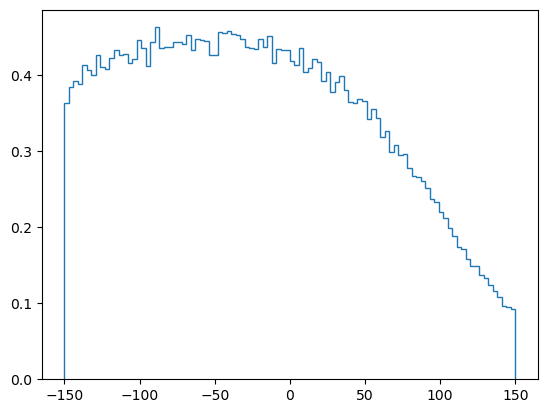

In [4]:

file = uproot.open("dati/cilindrofan/80mev/Hits.root")
tree = file["Hits"]

data = tree.arrays(library="pd")

edep= data['EDep']

xloc= data['xloc'] 


edep=np.array(edep)/17500
plt.hist(xloc,weights=edep,bins=100,histtype='step',range=(-150,150))
plt.show()


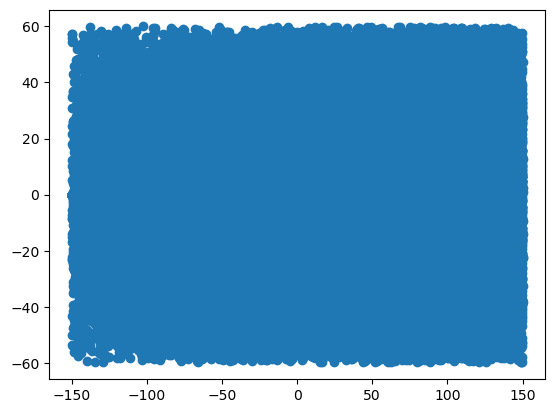

In [5]:
csv_file_path3 = 'dati/cilindrofan/80mev/gamma_entering_particles.csv'


df_gamma = pd.read_csv(csv_file_path3, delimiter=',', header=None, names=['Energy', 'X', 'Y', 'Z','pX', 'pY', 'pZ','evt'])


plt.scatter(df_gamma['X'], df_gamma['Y'], label='C11',)
#plt.xlim(-150, 150)
#plt.ylim(-100, 100)
plt.show()

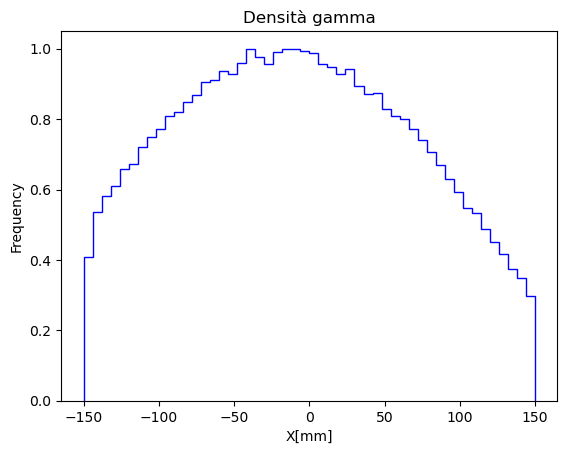

In [8]:
hist2d, x_edges, y_edges = np.histogram2d(df_gamma['X'], df_gamma['Y'], bins=(100, 1), range=[[-300.99, 299], [-100, 100]])

slice_index = 0

# Extract the slice from the 2D histogram
hist_slice = hist2d[:, slice_index]

hist_slice = hist_slice / np.max(hist_slice)

bin_centers_x = (x_edges[:-1] + x_edges[1:]) / 2

plt.hist(bin_centers_x, weights=hist_slice, color='blue', bins=50,histtype='step',range=(-150,150))

# Add labels and title
plt.xlabel('X[mm]')
plt.ylabel('Frequency')
plt.title('Densità gamma')

#plt.scatter(x,sig,color='red')

# Show the plot
plt.show()

In [9]:
theta=np.arccos(df_gamma['pX']/np.sqrt(df_gamma['pX']**2+df_gamma['pY']**2+df_gamma['pZ']**2))


In [10]:
df_gamma['theta']=theta

df_gamma=df_gamma[np.isclose(df_gamma['theta'],1.5,atol=0.5*1.5)]
